# Load Simple Workflow

## Plot

In [1]:
from python_workflow_definition.plot import plot

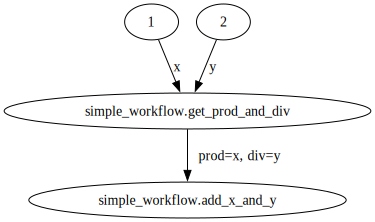

In [2]:
plot(file_name='workflow_simple.json')

## Aiida 

In [3]:
from python_workflow_definition.aiida import load_workflow_json

from aiida import load_profile
load_profile()

Profile<uuid='9da6a68ed2b14ffb920b92aa0a616339' name='pwd'>

In [4]:
workgraph = load_workflow_json(file_name='workflow_simple.json')

In [5]:
# TODO: Create inputs rather than tasks out of data nodes
workgraph

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'WorkGra…

In [6]:

workgraph.run()

04/12/2025 11:29:38 AM <905> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [27|WorkGraphEngine|continue_workgraph]: tasks ready to run: get_prod_and_div1
04/12/2025 11:29:39 AM <905> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [27|WorkGraphEngine|update_task_state]: Task: get_prod_and_div1, type: PyFunction, finished.
04/12/2025 11:29:39 AM <905> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [27|WorkGraphEngine|continue_workgraph]: tasks ready to run: add_x_and_y2
04/12/2025 11:29:40 AM <905> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [27|WorkGraphEngine|update_task_state]: Task: add_x_and_y2, type: PyFunction, finished.
04/12/2025 11:29:40 AM <905> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [27|WorkGraphEngine|continue_workgraph]: tasks ready to run: 
04/12/2025 11:29:40 AM <905> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [27|WorkGraphEngine|finalize

## executorlib

In [7]:
from executorlib import SingleNodeExecutor

In [8]:
from python_workflow_definition.executorlib import load_workflow_json

In [9]:
with SingleNodeExecutor(max_workers=1) as exe:
    result = load_workflow_json(file_name="workflow_simple.json", exe=exe).result()

In [10]:
result

2.5

## Jobflow

In [11]:
from jobflow.managers.local import run_locally

/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [12]:
from python_workflow_definition.jobflow import load_workflow_json

In [13]:
flow = load_workflow_json(file_name="workflow_simple.json")

In [14]:
result = run_locally(flow)
result

2025-04-12 11:29:43,039 INFO Started executing jobs locally
2025-04-12 11:29:43,310 INFO Starting job - get_prod_and_div (b3a6e2f9-8e30-4f70-bcf7-dfa5fb95c97b)
2025-04-12 11:29:43,315 INFO Finished job - get_prod_and_div (b3a6e2f9-8e30-4f70-bcf7-dfa5fb95c97b)
2025-04-12 11:29:43,316 INFO Starting job - add_x_and_y (d97fa51b-d1dc-498f-9a0b-dc1eaeac2a04)
2025-04-12 11:29:43,319 INFO Finished job - add_x_and_y (d97fa51b-d1dc-498f-9a0b-dc1eaeac2a04)
2025-04-12 11:29:43,321 INFO Finished executing jobs locally


{'b3a6e2f9-8e30-4f70-bcf7-dfa5fb95c97b': {1: Response(output={'prod': 2, 'div': 0.5}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))},
 'd97fa51b-d1dc-498f-9a0b-dc1eaeac2a04': {1: Response(output=2.5, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))}}

## pyiron

In [15]:
from pyiron_base import Project

In [16]:
from python_workflow_definition.pyiron_base import load_workflow_json

In [17]:
pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

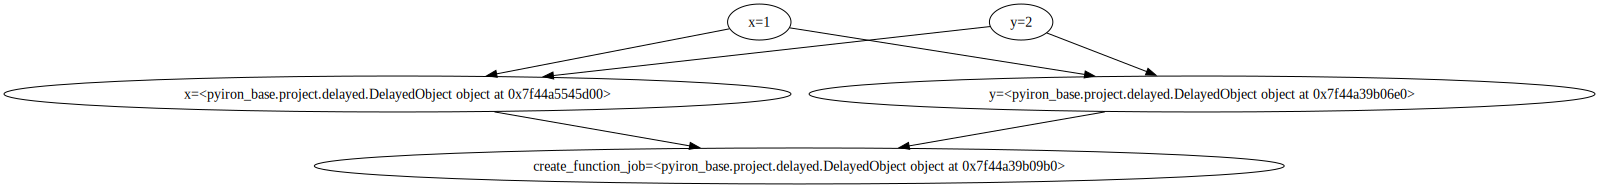

In [18]:
delayed_object = load_workflow_json(project=pr, file_name="workflow_simple.json")
delayed_object.draw()

In [19]:
delayed_object.pull()

The job get_prod_and_div_5e64acfa88dc01309cd4ba60143865e3 was saved and received the ID: 1
The job add_x_and_y_82c0f2025c97ddd328aaebe50fb30c48 was saved and received the ID: 2


2.5

In [20]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,None,get_prod_and_div_5e64acfa88dc01309cd4ba60143865e3,/get_prod_and_div_5e64acfa88dc01309cd4ba60143865e3,None,/home/jovyan/test/,2025-04-12 11:29:44.346792,None,None,pyiron@jupyter-pyiron-dev-pyth-flow-definition-a8grxfsa#1,PythonFunctionContainerJob,0.4,None,None
1,2,finished,None,add_x_and_y_82c0f2025c97ddd328aaebe50fb30c48,/add_x_and_y_82c0f2025c97ddd328aaebe50fb30c48,None,/home/jovyan/test/,2025-04-12 11:29:44.619719,None,None,pyiron@jupyter-pyiron-dev-pyth-flow-definition-a8grxfsa#1,PythonFunctionContainerJob,0.4,None,None


## Python

In [21]:
from python_workflow_definition.purepython import load_workflow_json

In [22]:
load_workflow_json(file_name="workflow_simple.json")

2.5